In [3]:
# Import code
from IsingModel import IsingModel

import numpy as np
import matplotlib.pyplot as plt

/Users/bertdepoorter/Nextcloud/Documents/School/Universiteit/Monte Carlo Methods/IsingModel.py:83: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [i, int((j+1+N)%N)]       # right neighbour


## Functionality
IsingModel has the following functions available:
- sample_energies: samples the energies for a given number of samples
- sample_spin_configurations: sample certain number of spin configurations with certain MC algorithm
- calculate_energy: calculate the energy of a given spin configuration
- visualize_energy: plot the sampled energy for a number of MC steps
- make_histogram: create a histogram that plots the distribution of the sampled energies / magnetizations
- get_magnetization: returns magnetization of a certain spin configuration
- get_exact_magnetization: returns exact magnetization for the initialized model
- plot_magnetization: returns plot like figure 3 in lecture notes, for a given number of sweeps

### Uniform sampling

In [ ]:
N = 10
model = IsingModel(
    size=N, 
    J=1, 
    T=4, 
    boundary_condition='helical', 
    sampling_method='uniform'
)

In [ ]:
num_samples = 10000

energies = model.sample_energies(num_samples)
model.visualize_energy(energies)

In [ ]:
model.make_histogram(energies, normalize=True)

### Boltzmann sampling: hit and miss method

In [10]:
# initialize Boltzmann model

N=10

model_hit_and_miss = IsingModel(
    N,
    T = 0.5,
    boundary_condition = 'helical',
    sampling_method = 'hit and miss'
)

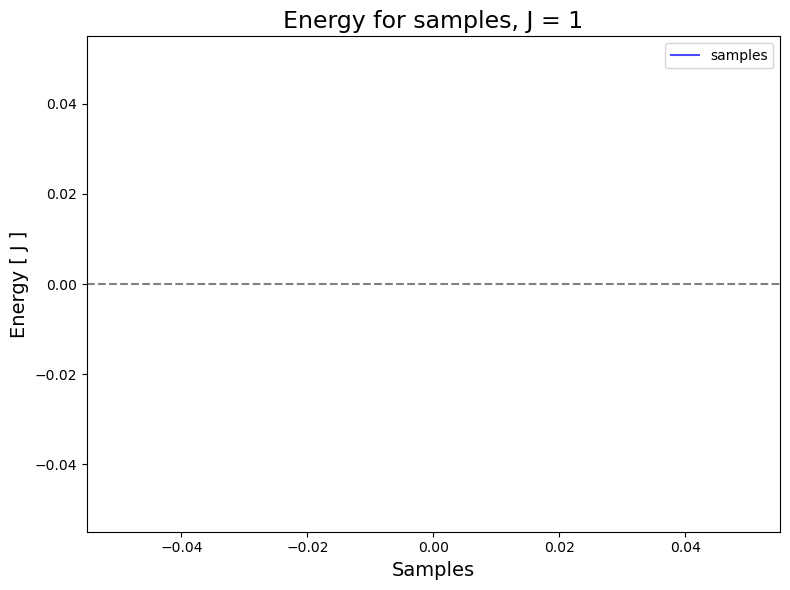

In [11]:
num_samples = 10000

energies = model_hit_and_miss.sample_energies(num_samples)
model_hit_and_miss.visualize_energy(energies)

In [12]:
print(energies)

[]


### Metropolis sampling

In [13]:
# initialize metropolis model
N = 10
model_metropolis = IsingModel(
    N,
    J=1,
    T=2,
    sampling_method='metropolis',
    boundary_condition='helical'
)

In [ ]:
num_samples = 10000
energies = model_metropolis.sample_energies(num_samples)
# print(energies)

In [ ]:
print(len(energies))

In [ ]:
model_metropolis.visualize_energy(energies)

In [ ]:
model_metropolis.make_histogram(energies, normalize=True)

In [ ]:
sweeps = 100
chains = 4
model_metropolis.plot_magnetization(sweeps, chains=chains)

In [ ]:
import numpy as np
J=1
T=1
M = (1-np.sinh(2*J/T)**(-4))**(1/8)
print(M)

10001
0.911319377877496


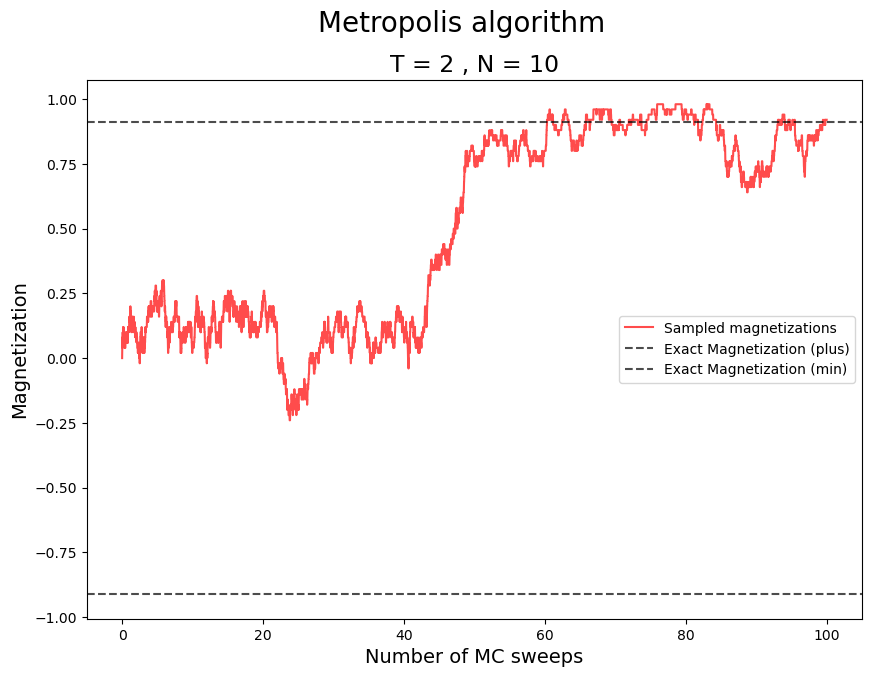

In [14]:
# same plot for the magnetization, but broken down in parts
# this allows for more flexibility and functionality

# Create spin samples
spin_samples = model_metropolis.sample_spin_configurations(10000)

# create magnetization plot
model_metropolis.plot_magnetization(len(spin_samples)/(N**2), spins=spin_samples)

In [15]:
# from this figure we estimate the equilibration time to be about 20 sweeps. 
sweeps_equilibration = 20
# convert sweeps to MC steps
steps_equilibration = N**2*sweeps_equilibration

# create time vector
time = np.linspace(steps_equilibration, len(spin_samples), len(spin_samples)-steps_equilibration-1)
for t in time:
    model_metropolis.autocorrelation(int(t), steps_equilibration, spin_samples)

tau_eq =  2000
tf =  10001
s =  2000
s =  2001
s =  2002
s =  2003
s =  2004
s =  2005
s =  2006
s =  2007
s =  2008
s =  2009
s =  2010
s =  2011
s =  2012
s =  2013
s =  2014
s =  2015
s =  2016
s =  2017
s =  2018
s =  2019
s =  2020
s =  2021
s =  2022
s =  2023
s =  2024
s =  2025
s =  2026
s =  2027
s =  2028
s =  2029
s =  2030
s =  2031
s =  2032
s =  2033
s =  2034
s =  2035
s =  2036
s =  2037
s =  2038
s =  2039
s =  2040
s =  2041
s =  2042
s =  2043
s =  2044
s =  2045
s =  2046
s =  2047
s =  2048
s =  2049
s =  2050
s =  2051
s =  2052
s =  2053
s =  2054
s =  2055
s =  2056
s =  2057
s =  2058
s =  2059
s =  2060
s =  2061
s =  2062
s =  2063
s =  2064
s =  2065
s =  2066
s =  2067
s =  2068
s =  2069
s =  2070
s =  2071
s =  2072
s =  2073
s =  2074
s =  2075
s =  2076
s =  2077
s =  2078
s =  2079
s =  2080
s =  2081
s =  2082
s =  2083
s =  2084
s =  2085
s =  2086
s =  2087
s =  2088
s =  2089
s =  2090
s =  2091
s =  2092
s =  2093
s =  2094
s =  2095
s =  2096
s =

/Users/bertdepoorter/Nextcloud/Documents/School/Universiteit/Monte Carlo Methods/IsingModel.py:83: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [i, int((j+1+N)%N)]       # right neighbour
/Users/bertdepoorter/Nextcloud/Documents/School/Universiteit/Monte Carlo Methods/IsingModel.py:83: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [i, int((j+1+N)%N)]       # right neighbour
/Users/bertdepoorter/Nextcloud/Documents/School/Universiteit/Monte Carlo Methods/IsingModel.py:83: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [i, int((j+1+N)%N)]       # right neighbour


IndexError: index 10001 is out of bounds for axis 0 with size 10001